# Practica 3b - Regresión Lineal Múltiple

### Ejercicio 6
Utilice los scripts disponibles en la teoría y práctica para entrenar un combinador lineal. El modelo debe 
recibir tres dígitos binarios y retornar la representación decimal del número que resulta de la combinación 
de dígitos (para las entradas 000, 010 y 101 debe obtener las salidas 0, 2 y 5, respectivamente) 

a) Utilizando el bias o peso W0 (comportamiento normal) 

b) Utilizando únicamente las tres entradas correspondientes a los dígitos binarios anulando el bias o W0 
del cálculo. 

Compare la cantidad de iteraciones necesarias para obtener el vector de pesos correcto en ambos casos. 
Observe el valor del arco correspondiente al bias en a). 

In [59]:
from grafica import *
from ClassNeuronaLineal import NeuronaLineal
from ClassNeuronaGral import NeuronaGradiente
import numpy as np
from sklearn import preprocessing

combinaciones_X = [
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
]

numeros_correspondientes = [0, 1, 2, 3, 4, 5, 6, 7]

X = np.array(combinaciones_X)
Y = np.array(numeros_correspondientes)

# Normalizo
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

#### Inciso a - Modelo con BIAS - Neurona Lineal

In [60]:
primer_modelo = NeuronaLineal(alpha = 0.01, n_iter= 100, cotaE=10e-06)
primer_modelo.fit(X, Y)
print("PESOS CON BIAS = ", primer_modelo.w_) 
print("BIAS = ", primer_modelo.b_)

PESOS CON BIAS =  [1.99862643 0.99951057 0.49927942]
BIAS =  3.4981156063657526


In [61]:
# Verificar que el modelo funciona correctamente
print("\n=== VERIFICACIÓN DEL MODELO ===")
predicciones = primer_modelo.predict(X)
print("Entradas -> Predicciones vs Esperado")
print("-" * 40)

# Mostrar cada predicción vs valor esperado
for i in range(len(combinaciones_X)):
    entrada_original = combinaciones_X[i]
    prediccion = predicciones[i]
    esperado = Y[i]
    error = abs(prediccion - esperado)
    
    print(f"{entrada_original} -> {prediccion:.2f} vs {esperado} (Error: {error:.2f})")

# Calcular error promedio
error_promedio = np.mean(np.abs(predicciones - Y))
print(f"\nError promedio absoluto: {error_promedio:.4f}")

# Mostrar si las predicciones son correctas (con tolerancia)
tolerancia = 0.1
correctas = np.sum(np.abs(predicciones - Y) < tolerancia)
print(f"Predicciones correctas (tolerancia ±{tolerancia}): {correctas}/{len(Y)}")

if correctas == len(Y):
    print("✅ El modelo funciona correctamente!")
else:
    print("❌ El modelo necesita más entrenamiento")


=== VERIFICACIÓN DEL MODELO ===
Entradas -> Predicciones vs Esperado
----------------------------------------
[0, 0, 0] -> 0.00 vs 0 (Error: 0.00)
[0, 0, 1] -> 1.00 vs 1 (Error: 0.00)
[0, 1, 0] -> 2.00 vs 2 (Error: 0.00)
[0, 1, 1] -> 3.00 vs 3 (Error: 0.00)
[1, 0, 0] -> 4.00 vs 4 (Error: 0.00)
[1, 0, 1] -> 5.00 vs 5 (Error: 0.00)
[1, 1, 0] -> 6.00 vs 6 (Error: 0.00)
[1, 1, 1] -> 7.00 vs 7 (Error: 0.00)

Error promedio absoluto: 0.0021
Predicciones correctas (tolerancia ±0.1): 8/8
✅ El modelo funciona correctamente!


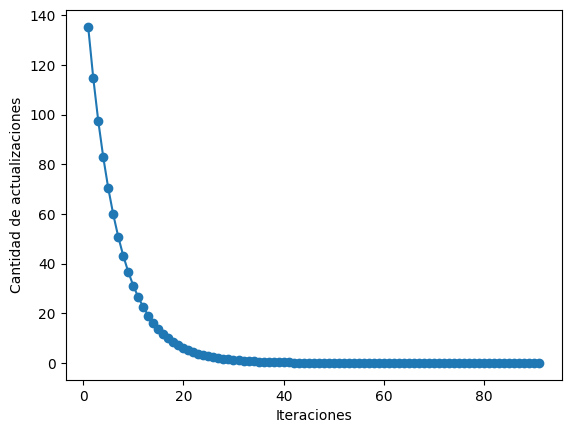

In [62]:
from matplotlib import pyplot as plt
plt.plot(range(1, len(primer_modelo.errors_) + 1), primer_modelo.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

#### Inciso b -  Modelo sin BIAS - Neurona Gradiente

VENTAJAS MODELO CON BIAS

El modelo sin bias comienza con un error mucho mayor en comparacion al modelo sin bias

VENTAJAS MODELO SIN BIAS

El modelo sin bias reduce su error mucho mas rapidamente pasando de 138 a menos de 1 en pocas iteraciones
El modelo con bias converge mucho mas lentamente su error se reduce de manera mas gradual
El error final del modelo sin bias es extremadamente bajo lo que indica una mejor capacidad de ajustarse a los datos
El error final del modelo con bias se estabiliza en 133 lo que indica que no ajusta tan bien como el modelo sin bias
ENTONCES

El modelo sin bias tiene un mejor rendimiento en este problema ya que hay una relacion lineal directa entre las caracteristicas y la salida sonde la recta que mejor ajusta los datos pasa por el origen y no se requiere bias para desplazar la recta

### Ejercicio 7
Utilizando los atributos numéricos del archivo Autos.csv entrene un combinador lineal para predecir el 
precio del auto en función del resto de los atributos. Tenga en cuenta la existencia de valores faltantes. 
Realice varias ejecuciones y observe los vectores de pesos obtenidos. ¿Puede identificar cuáles son los 
atributos con mayor incidencia en la determinación del precio? Explique. 

In [63]:
import pandas as pd

df = pd.read_csv('Autos.csv')

# Elimino columnas con valores no numéricos
df.drop('make', axis=1, inplace=True)
df.drop('fuel-type', axis=1, inplace=True)
df.drop('aspiration', axis=1, inplace=True)
df.drop('num-of-doors', axis=1, inplace=True)
df.drop('body-style', axis=1, inplace=True)
df.drop('drive-wheels', axis=1, inplace=True)
df.drop('engine-location', axis=1, inplace=True)
df.drop('engine-type', axis=1, inplace=True)
df.drop('fuel-system', axis=1, inplace=True)
df.drop('num-of-cylinders', axis=1, inplace=True)

# Reemplazo los '?' por NaN
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [64]:
nomAtrib = np.array(df.columns.values).reshape(-1,1)
# Converto las columnas a tipo numérico
for col in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

values = {'normalized-losses': df['normalized-losses'].mean(),
          'bore': df['bore'].mean(),
          'stroke': df['stroke'].mean(),
          'horsepower': df['horsepower'].mean(),
          'peak-rpm': df['peak-rpm'].mean(),
          'price': df['price'].mean()}

df = df.fillna(value=values)
df.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<Axes: >

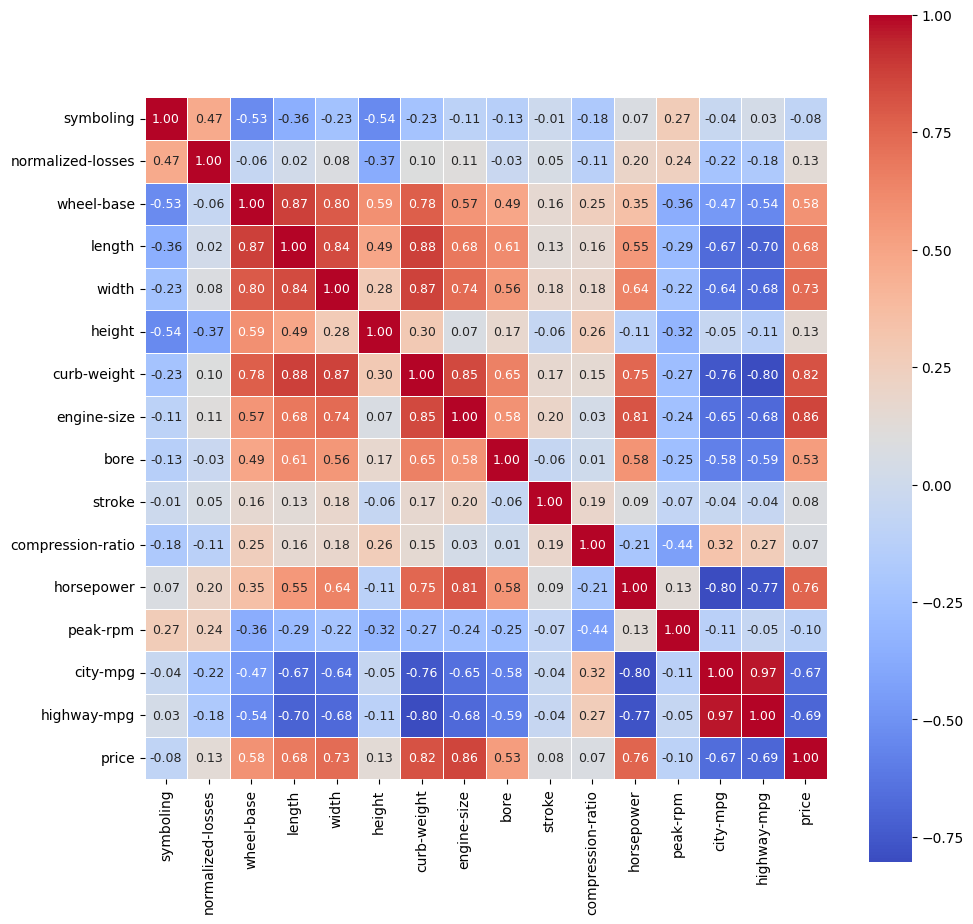

In [65]:
import seaborn as sns

# Imprime matriz de correclacion
corr = df.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr, square=True,  annot=True, linewidths=.5, cmap='coolwarm', annot_kws={'fontsize':9}, fmt='.2f')

Normalización: 1


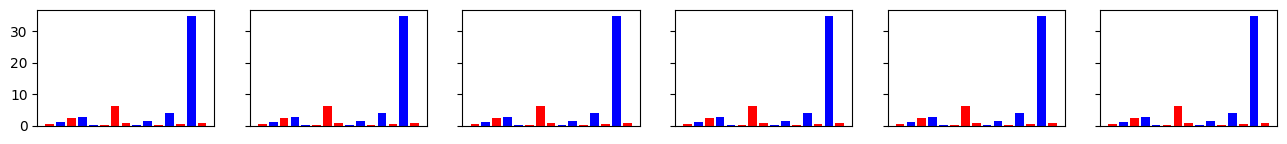

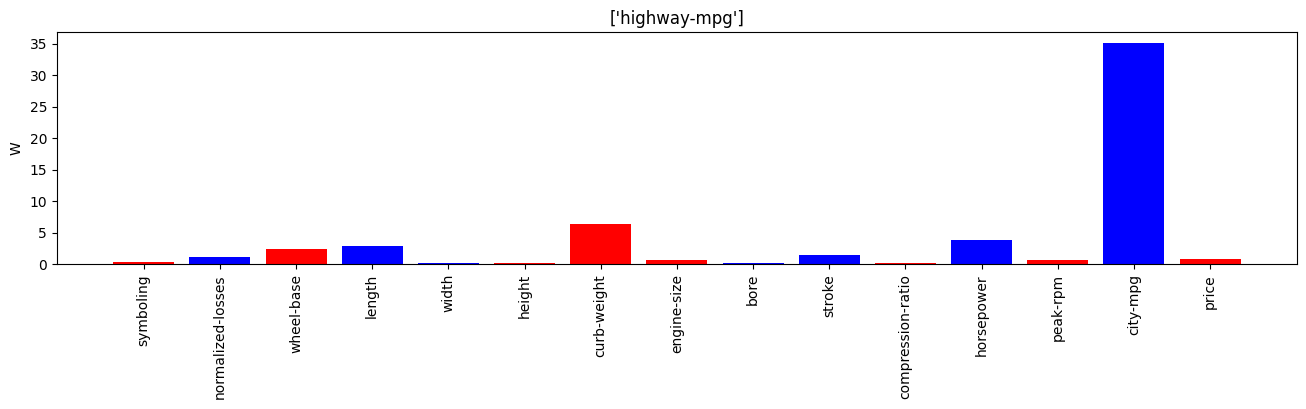

Normalización: 2


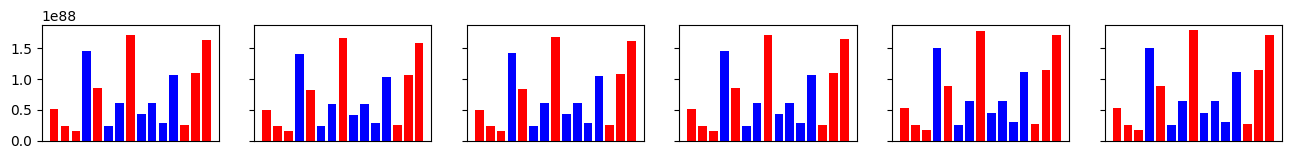

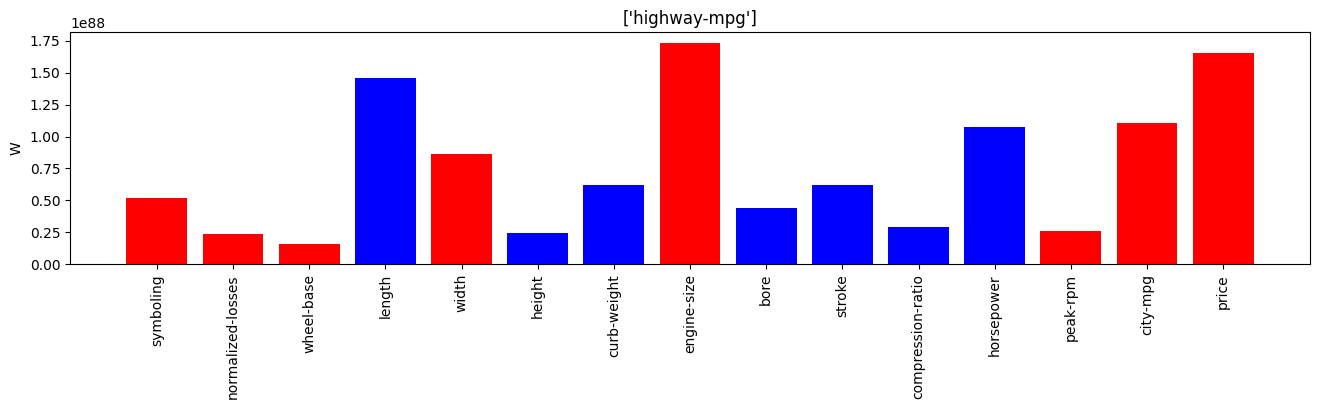

In [66]:
Ejemplos = np.array(df)

# separa aributos y target
attPred = 14 #12 mpg y 14 precio  #-- nro de atributo a predecir
T = Ejemplos[:, attPred].reshape(-1,1) # (N,) => (N,1)
Ejemplos = np.delete(Ejemplos, [attPred], 1) #elimina la columna 12 a lo largo del eje 1

nomPred = nomAtrib[attPred]
nomCols = np.delete(nomAtrib, [attPred])

alfa = 0.05
MAX_ITE = 200
CotaError = 10e-03
CANT_PLOTS = 6

for normalizarEntrada in [1, 2]:
    # normalización
    if normalizarEntrada == 1:
        normalizador = preprocessing.MinMaxScaler()
        X = normalizador.fit_transform(Ejemplos)
    elif normalizarEntrada == 2:
        normalizador = preprocessing.StandardScaler()
        X = normalizador.fit_transform(Ejemplos)
    else:
        X = Ejemplos

    w_acc = np.zeros(len(nomCols)) # acumulador para pesos

    fig,subs=plt.subplots(1, CANT_PLOTS, sharex='col', sharey='row', figsize=(16,1.5))

    print('Normalización: %d' % normalizarEntrada)

    for i in range(0, CANT_PLOTS):
        modelo = NeuronaLineal(alpha=alfa, n_iter=MAX_ITE, cotaE=CotaError)
        modelo.fit(X, T)

        w_acc += modelo.w_ # acumula pesos para despues promediar

        # Colores para barras positivas y negativas. La idea es dibujarlas positivas
        # para comparar la magnitud y pintar de otro color las negativas
        colores = ['blue' if valor >= 0 else 'red' for valor in  modelo.w_]
        subs[i].bar(np.arange(len(modelo.w_)), np.abs(modelo.w_), color=colores)
        subs[i].set_xticks([])

    w_prom = w_acc / CANT_PLOTS

    # Color azul para barras positivas y rojo para negativas
    colores = ['blue' if valor >= 0 else 'red' for valor in w_prom]

    barras = np.abs(w_prom)
    plt.figure(figsize=(16,4))
    N=len(barras)

    plt.bar(np.arange(N), barras, color=colores)   # Gráfico de barras
    plt.title(nomPred)           # Colocamos el título
    plt.ylabel('W')
    plt.xticks(np.arange(N), nomCols, rotation='vertical')
    plt.subplots_adjust(bottom=0.3)
    plt.show()

### Ejercicio 8
El archivo semillas.csv contiene información de granos que pertenecen a tres variedades diferentes de 
trigo. Entrene una neurona no lineal para determinar si una semilla es de “TIPO 2” o no. Divida el 60% de los 
ejemplos para entrenar y el 40% para realizar el testeo. Antes de entrenar, normalice todos los atributos 
numéricos aplicando media y desvío. 
Realice los siguientes experimentos con el fin de analizar cómo distintos hiperparámetros afectan la 
convergencia y el desempeño del modelo: 

a) Lleve a cabo 20 experimentos, utilizando la función sigmoide, variando la tasa de aprendizaje 
desde α = 0.04, incrementando en pasos de 0.04 (es decir, α = 0.04, 0.08, ..., hasta 0.80). En cada 
experimento, registre:  
curva de error (error por iteración), curva de accuracy (precisión por iteración), cantidad total de 
iteraciones realizadas, la iteración en la que se alcanzó el 100% de accuracy. 

Experimento 1: alpha=0.04, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.964


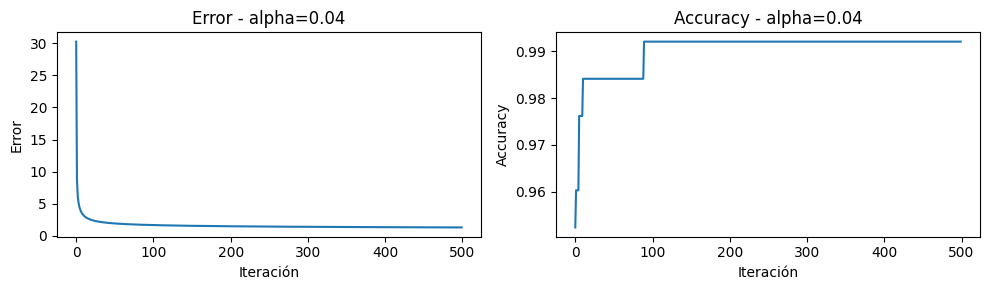

Experimento 2: alpha=0.08, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.976


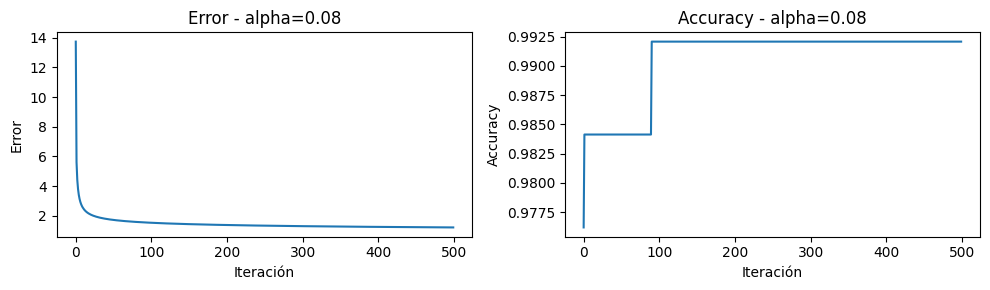

Experimento 3: alpha=0.12, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.976


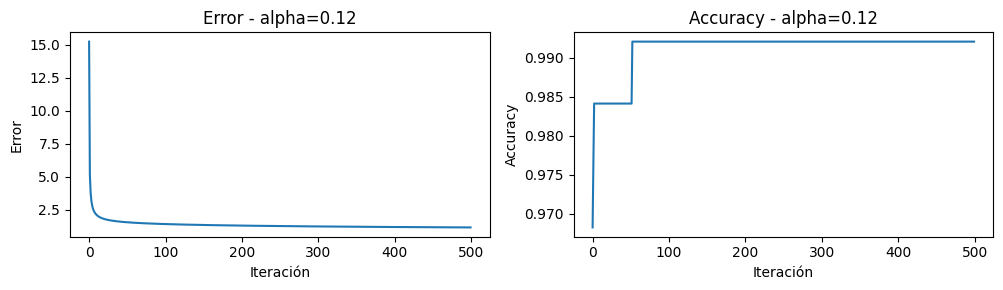

Experimento 4: alpha=0.16, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.976


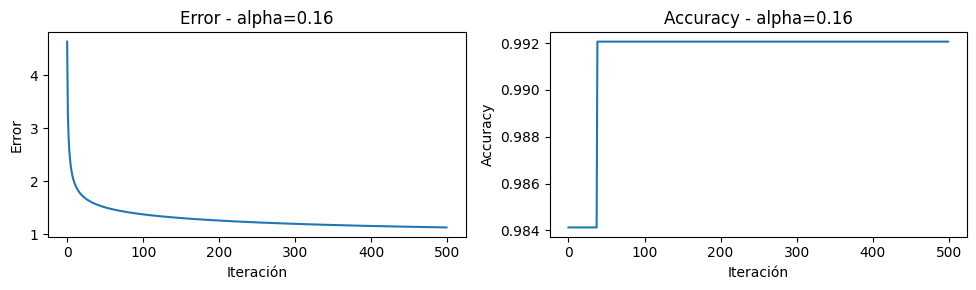

Experimento 5: alpha=0.20, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.976


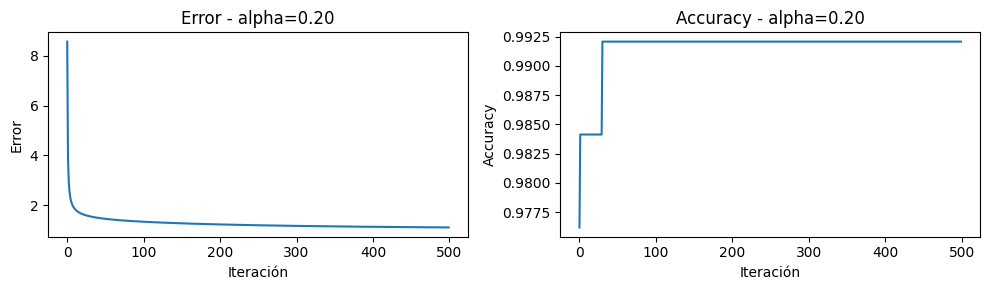

Experimento 6: alpha=0.24, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.976


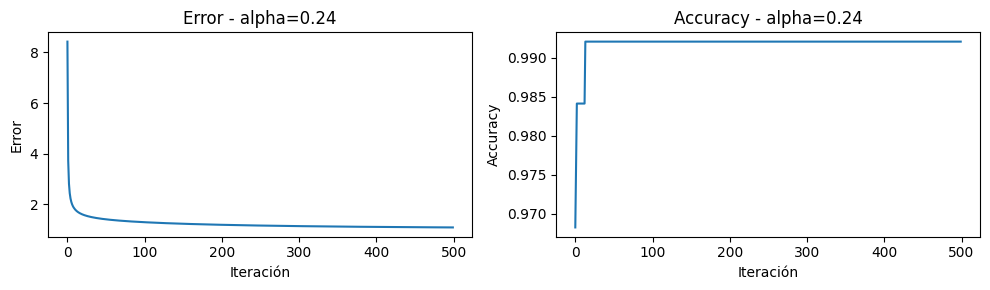

Experimento 7: alpha=0.28, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.976


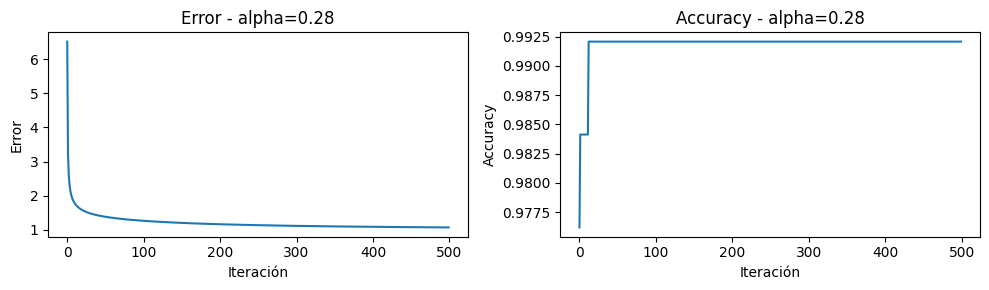

Experimento 8: alpha=0.32, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.976


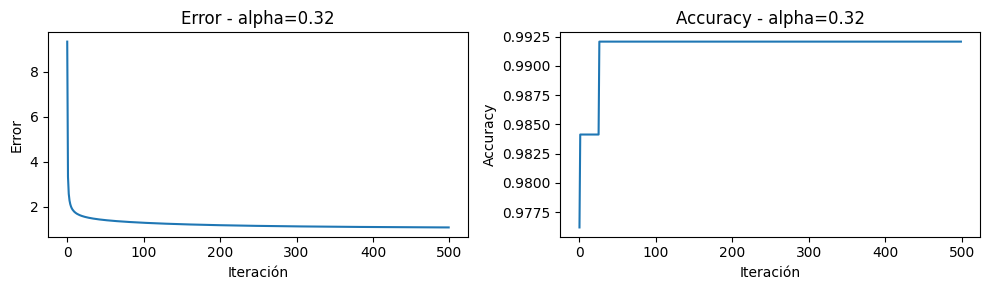

Experimento 9: alpha=0.36, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.964


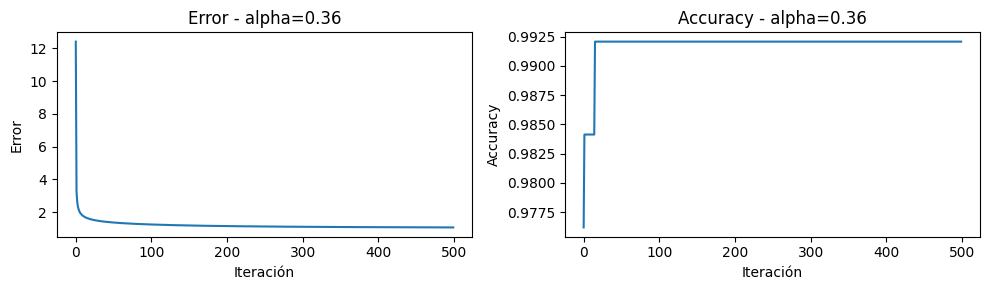

Experimento 10: alpha=0.40, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.964


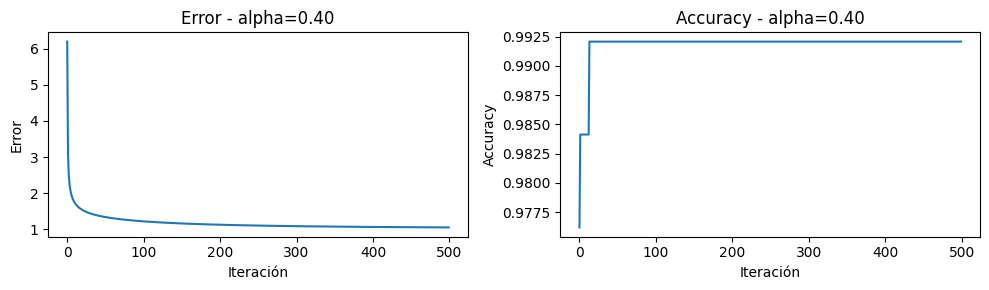

Experimento 11: alpha=0.44, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.964


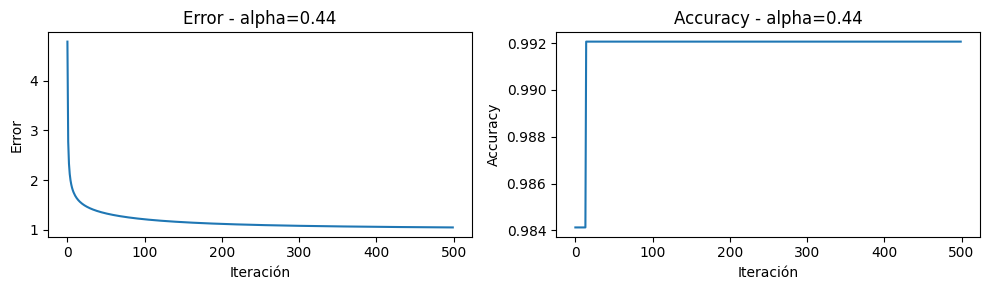

Experimento 12: alpha=0.48, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.964


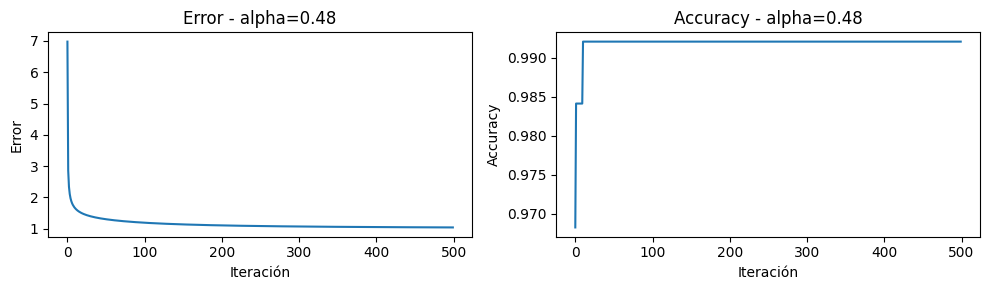

Experimento 13: alpha=0.52, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.964


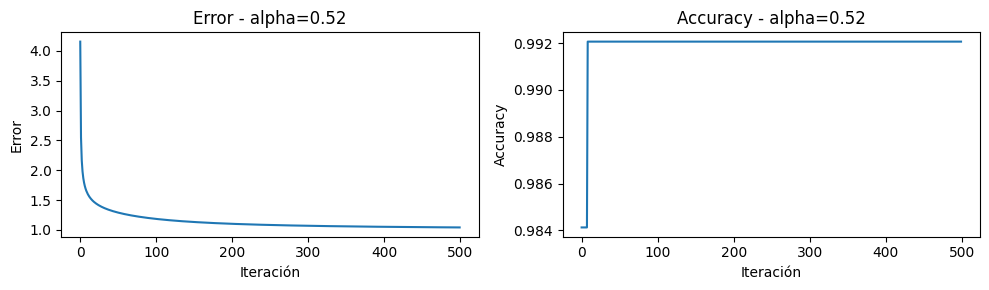

Experimento 14: alpha=0.56, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.964


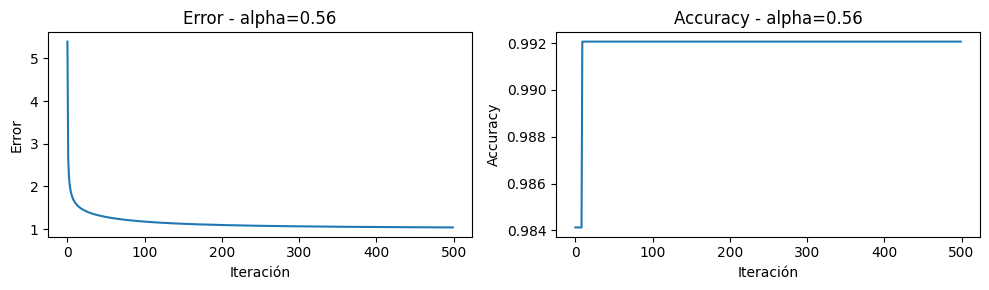

Experimento 15: alpha=0.60, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.964


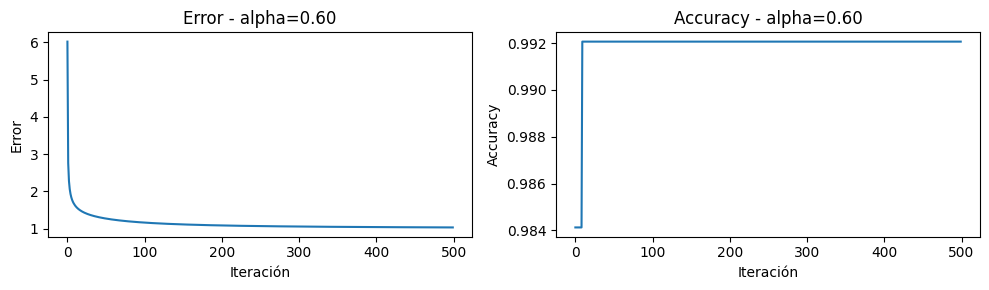

Experimento 16: alpha=0.64, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.964


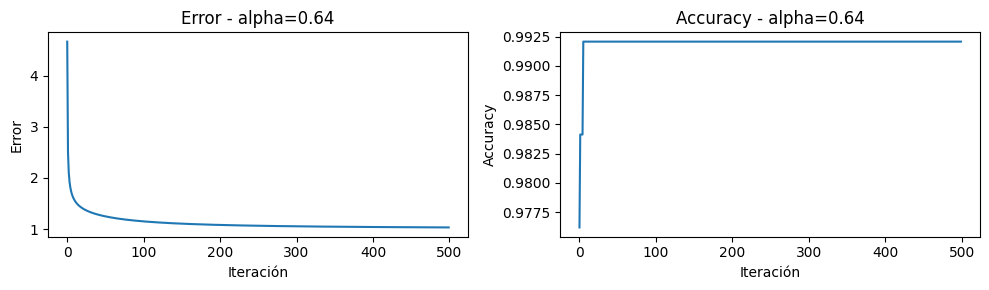

Experimento 17: alpha=0.68, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.964


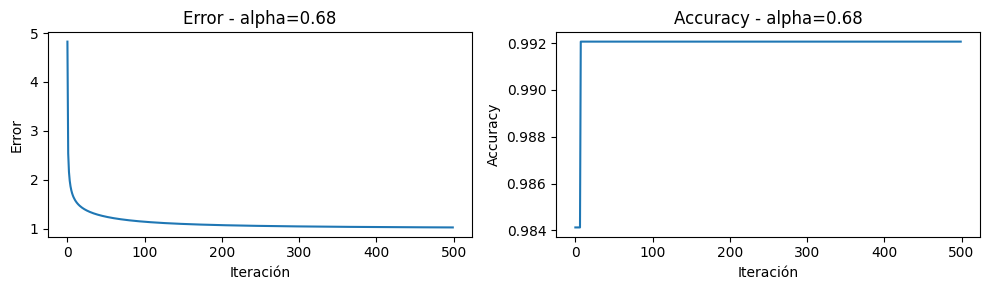

Experimento 18: alpha=0.72, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.964


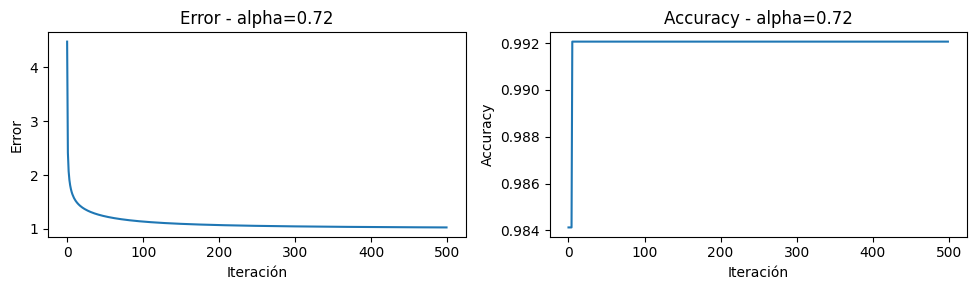

Experimento 19: alpha=0.76, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.964


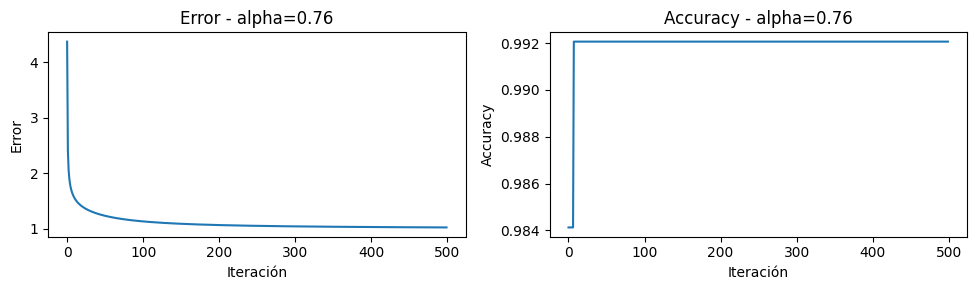

Experimento 20: alpha=0.80, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.964


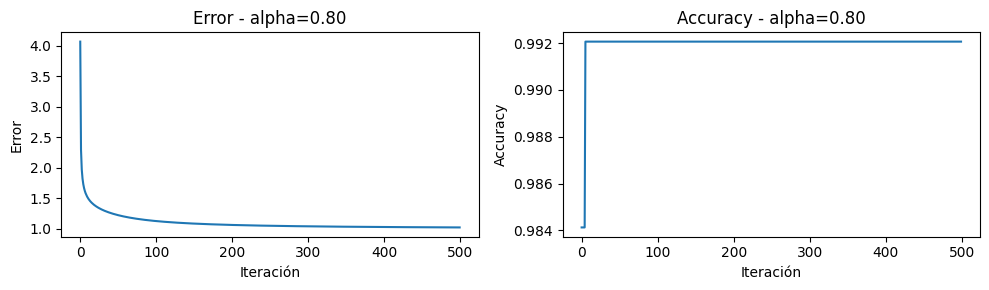

In [67]:
from ClassNeuronaGral import NeuronaGradiente
from sklearn import preprocessing

df = pd.read_csv('semillas.csv')

# Cambio los atributos de la columna clase a valores numericos 
df["Clase"] = df["Clase"].map({"Tipo2": 0, "Tipo3": 1, "Tipo1": 1})

# Normalizo los datos usando media y desvio
scaler = preprocessing.StandardScaler()
df[["Area", "Perimetro", "Compacidad", "LongNucleo", "AnchoNucleo", "Asimetria", "LongSurco"]] = scaler.fit_transform(df[["Area", "Perimetro", "Compacidad", "LongNucleo", "AnchoNucleo", "Asimetria", "LongSurco"]])

# Divido los ejemplos en 60% y 40%
train = df.sample(frac=0.6, random_state=1)
test = df.drop(train.index)

# Entreno neurona no lineal
alpha = 0.04
for experimento in range(20):
    X_train = train[["Area", "Perimetro", "Compacidad", "LongNucleo", "AnchoNucleo", "Asimetria", "LongSurco"]].to_numpy()
    Y_train = train["Clase"].to_numpy()
    modelo = NeuronaGradiente(alpha=alpha, n_iter=500, cotaE=10e-06, FUN='sigmoid',)
    modelo.fit(X_train, Y_train)

    # Curva de error y accuracy por iteración
    errores = modelo.errors_
    accuracies = modelo.accuracy_

    # Iteración donde se alcanza 100% accuracy (si ocurre)
    iter_100 = next((i for i, acc in enumerate(accuracies) if acc == 1.0), None)

    # Evaluación en test
    X_test = test[["Area", "Perimetro", "Compacidad", "LongNucleo", "AnchoNucleo", "Asimetria", "LongSurco"]].to_numpy()
    Y_test = test["Clase"].to_numpy()
    predicciones = modelo.predict(X_test)
    correctas = np.sum(predicciones == Y_test)
    accuracy_test = correctas / len(Y_test)

    print(f"Experimento {experimento+1}: alpha={alpha:.2f}, Iteraciones: {len(errores)}, "
          f"Iter 100% acc: {iter_100}, Accuracy test: {accuracy_test:.3f}")

    # Opcional: graficar curvas de error y accuracy
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.plot(errores)
    plt.title(f'Error - alpha={alpha:.2f}')
    plt.xlabel('Iteración')
    plt.ylabel('Error')
    plt.subplot(1,2,2)
    plt.plot(accuracies)
    plt.title(f'Accuracy - alpha={alpha:.2f}')
    plt.xlabel('Iteración')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.show()

    alpha += 0.04


b) Replique el punto a) utilizando tangente hiperbólica. 

Experimento 1: alpha=0.04, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


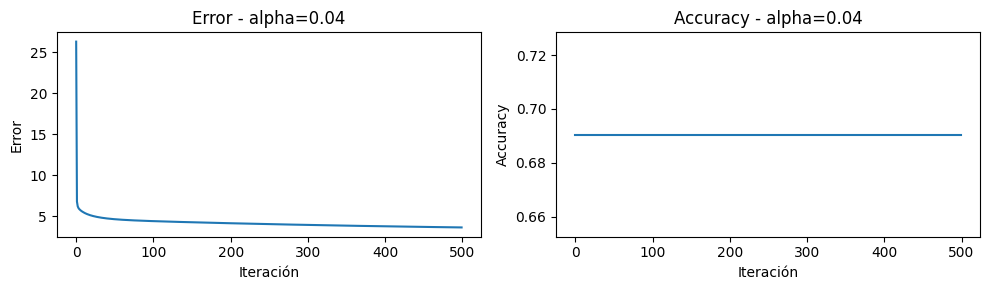

Experimento 2: alpha=0.08, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


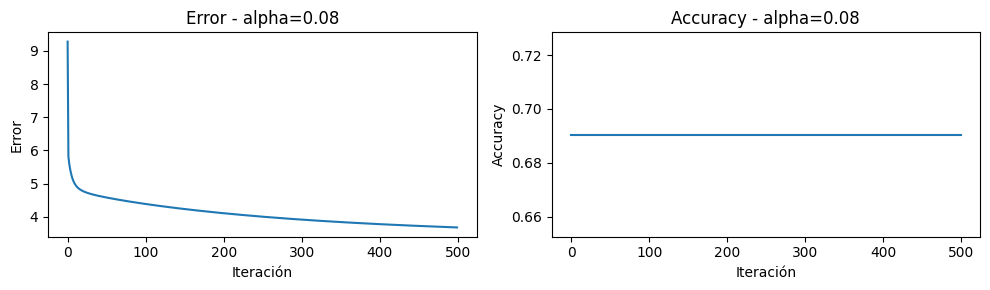

Experimento 3: alpha=0.12, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


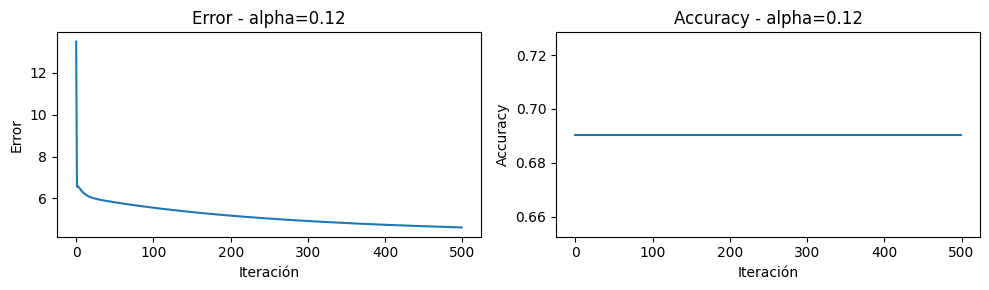

Experimento 4: alpha=0.16, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


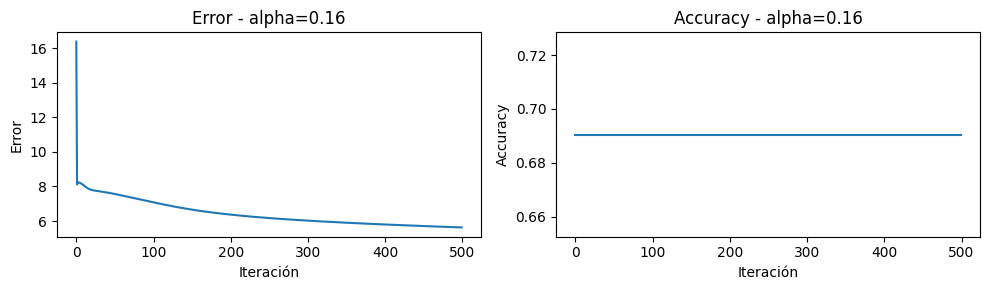

Experimento 5: alpha=0.20, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


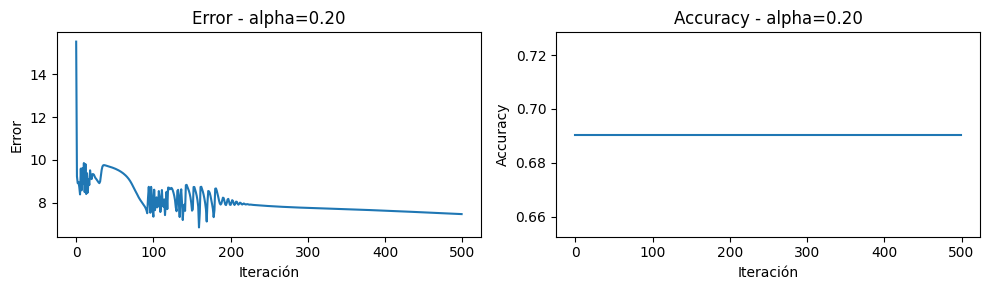

Experimento 6: alpha=0.24, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


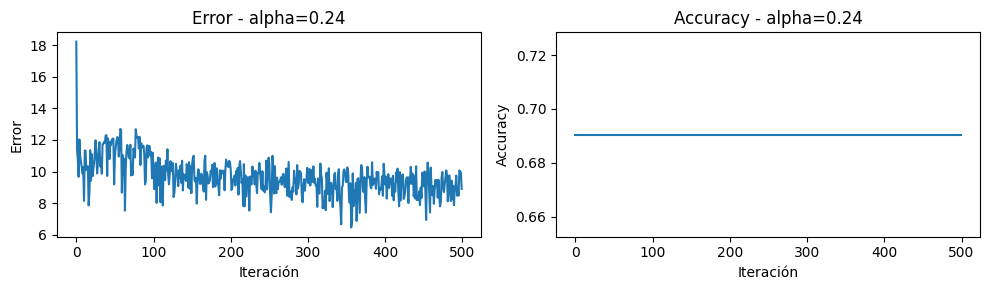

Experimento 7: alpha=0.28, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


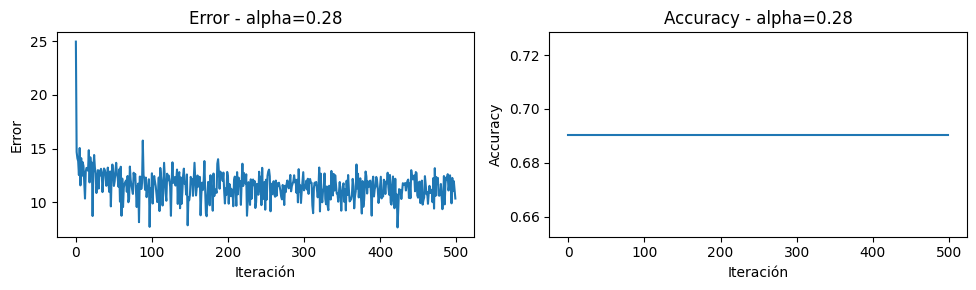

Experimento 8: alpha=0.32, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


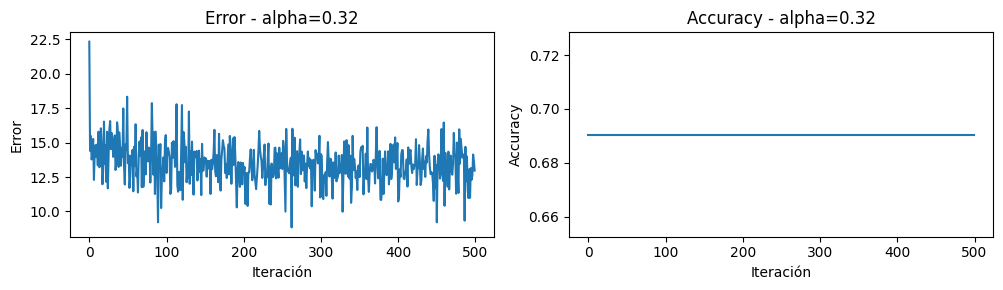

Experimento 9: alpha=0.36, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


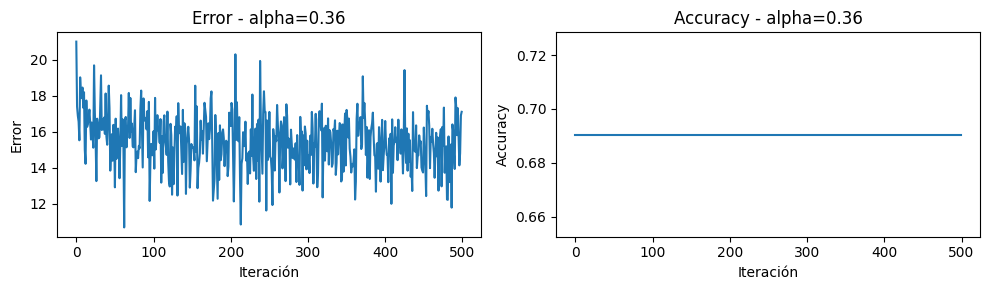

Experimento 10: alpha=0.40, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


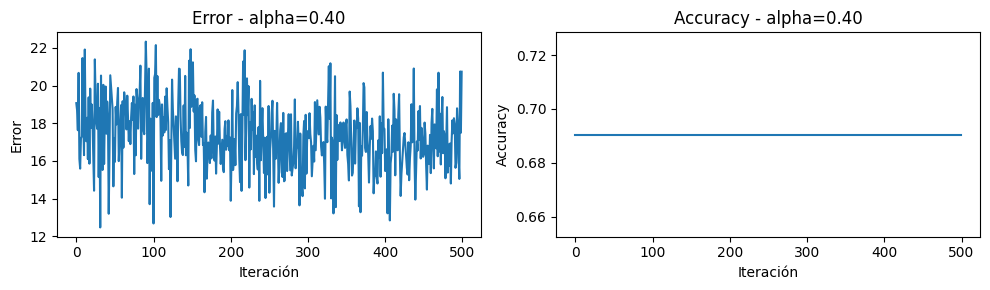

Experimento 11: alpha=0.44, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


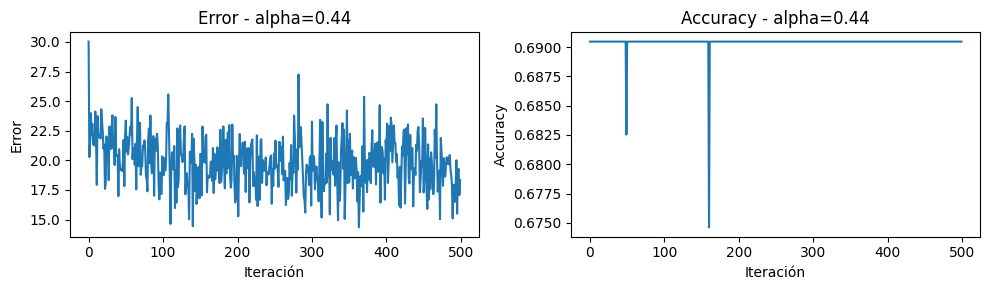

Experimento 12: alpha=0.48, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


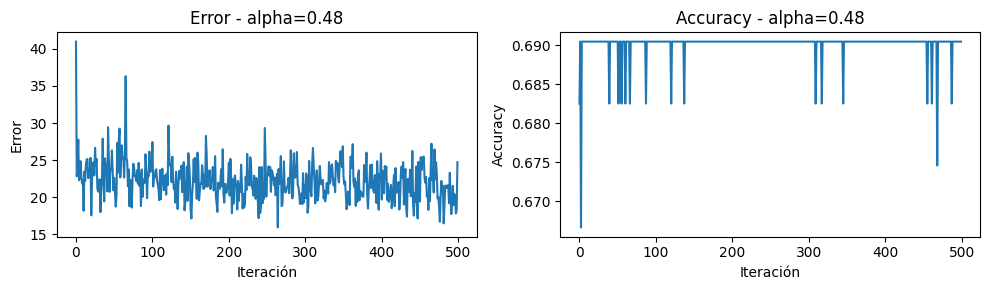

Experimento 13: alpha=0.52, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


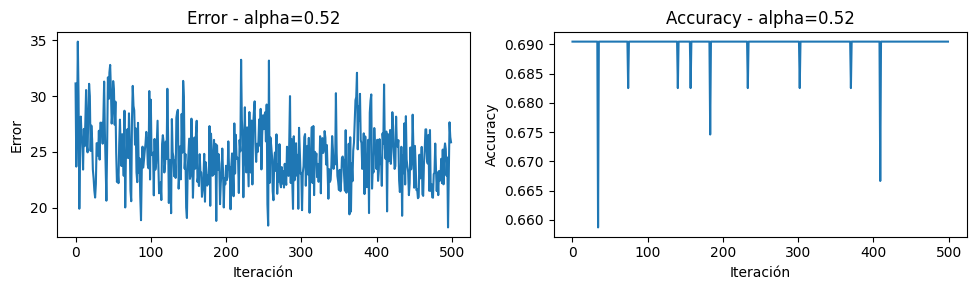

Experimento 14: alpha=0.56, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


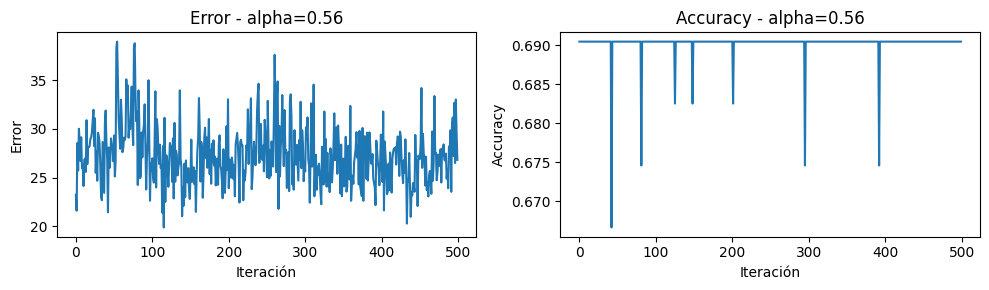

Experimento 15: alpha=0.60, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


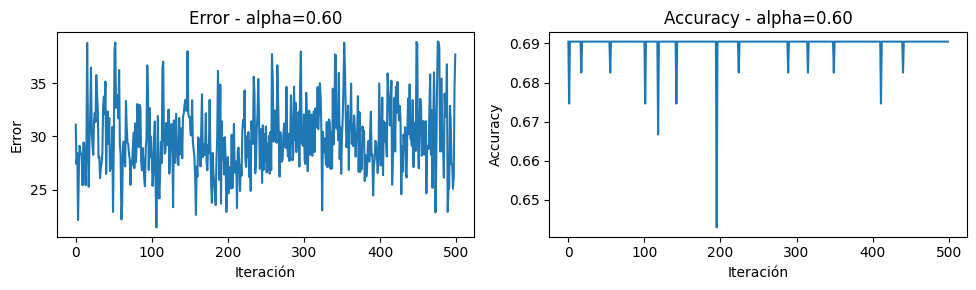

Experimento 16: alpha=0.64, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


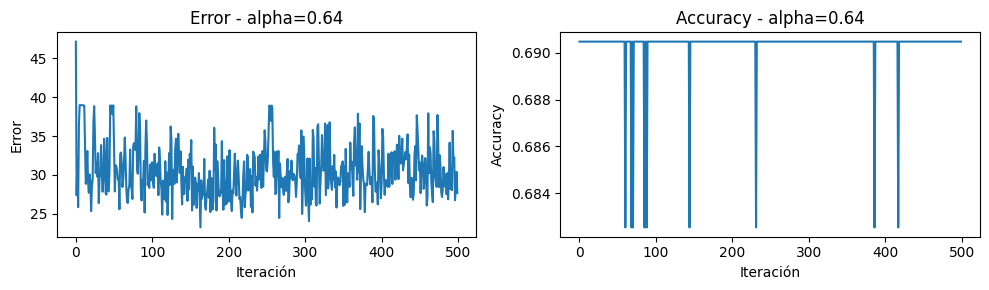

Experimento 17: alpha=0.68, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.619


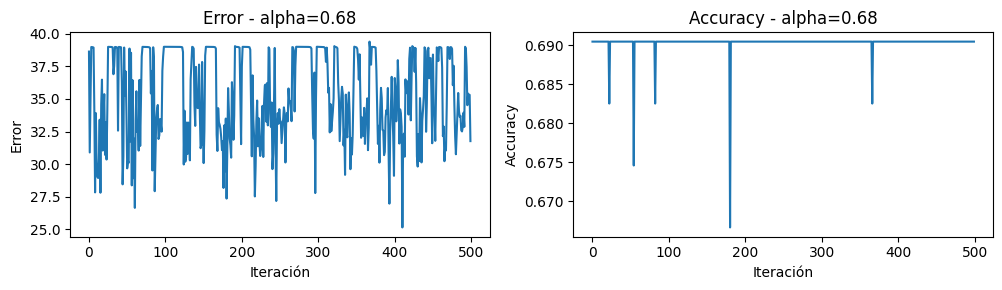

Experimento 18: alpha=0.72, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.619


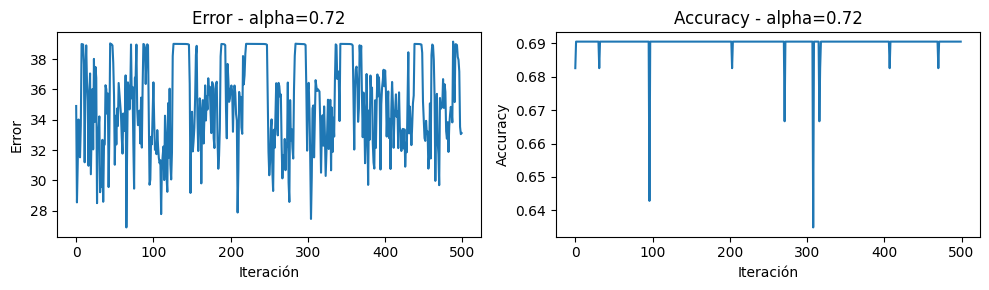

Experimento 19: alpha=0.76, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.631


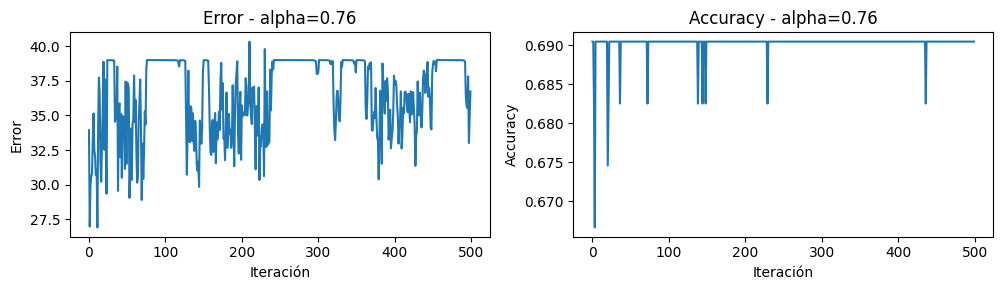

Experimento 20: alpha=0.80, Iteraciones: 500, Iter 100% acc: None, Accuracy test: 0.619


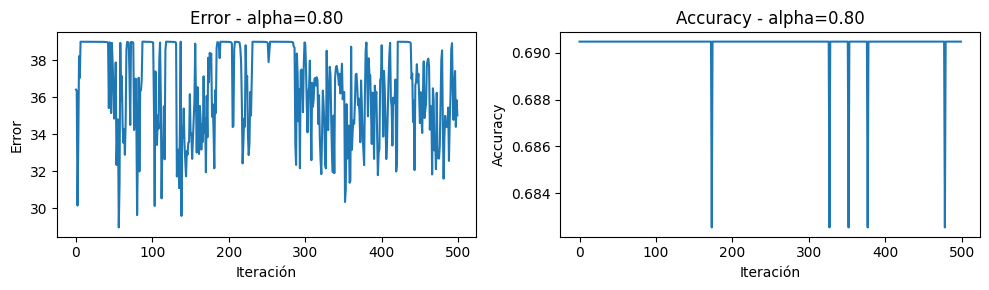

In [68]:
from ClassNeuronaGral import NeuronaGradiente
from sklearn import preprocessing

df = pd.read_csv('semillas.csv')

# Cambio los atributos de la columna clase a valores numericos 
df["Clase"] = df["Clase"].map({"Tipo2": 0, "Tipo3": 1, "Tipo1": 1})

# Normalizo los datos usando media y desvio
scaler = preprocessing.StandardScaler()
df[["Area", "Perimetro", "Compacidad", "LongNucleo", "AnchoNucleo", "Asimetria", "LongSurco"]] = scaler.fit_transform(df[["Area", "Perimetro", "Compacidad", "LongNucleo", "AnchoNucleo", "Asimetria", "LongSurco"]])

# Divido los ejemplos en 60% y 40%
train = df.sample(frac=0.6, random_state=1)
test = df.drop(train.index)

# Entreno neurona no lineal
alpha = 0.04
for experimento in range(20):
    X_train = train[["Area", "Perimetro", "Compacidad", "LongNucleo", "AnchoNucleo", "Asimetria", "LongSurco"]].to_numpy()
    Y_train = train["Clase"].to_numpy()
    modelo = NeuronaGradiente(alpha=alpha, n_iter=500, cotaE=10e-06, FUN='tanh')
    modelo.fit(X_train, Y_train)

    # Curva de error y accuracy por iteración
    errores = modelo.errors_
    accuracies = modelo.accuracy_

    # Iteración donde se alcanza 100% accuracy (si ocurre)
    iter_100 = next((i for i, acc in enumerate(accuracies) if acc == 1.0), None)

    # Evaluación en test
    X_test = test[["Area", "Perimetro", "Compacidad", "LongNucleo", "AnchoNucleo", "Asimetria", "LongSurco"]].to_numpy()
    Y_test = test["Clase"].to_numpy()
    predicciones = modelo.predict(X_test)
    correctas = np.sum(predicciones == Y_test)
    accuracy_test = correctas / len(Y_test)

    print(f"Experimento {experimento+1}: alpha={alpha:.2f}, Iteraciones: {len(errores)}, "
          f"Iter 100% acc: {iter_100}, Accuracy test: {accuracy_test:.3f}")

    # Opcional: graficar curvas de error y accuracy
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.plot(errores)
    plt.title(f'Error - alpha={alpha:.2f}')
    plt.xlabel('Iteración')
    plt.ylabel('Error')
    plt.subplot(1,2,2)
    plt.plot(accuracies)
    plt.title(f'Accuracy - alpha={alpha:.2f}')
    plt.xlabel('Iteración')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.show()

    alpha += 0.04

### Ejercicio 9
Se ha realizado un análisis químico a tres tipos distintos de vinos producidos en una misma región de Italia. 
El número de muestras considerado es el siguiente: 

Tipo 1 ➔ 59 muestras, Tipo 2 ➔ 71 muestras, Tipo 3 ➔ 48 muestras 

El archivo vinos.csv permite observar los resultados de este análisis. Cada fila representa una muestra 
distinta y está formada, en primer lugar, por el número del tipo al cual pertenece el vino analizado seguido 
por los 13 atributos que lo caracterizan. 
Por ejemplo, la siguiente fila: 

2, 12.29, 3.17, 2.21, 18, 88, 2.85, 2.99, 0.45, 2.81, 2.3, 1.42, 2.83, 406

es el resultado del análisis de un vino correspondiente al tipo 2 (1er. valor de la fila) seguido por 13 valores 
separados por comas que indican los niveles de las mediciones realizadas a dicho vino.  

a) Entrene una red neuronal formada por una única neurona para clasificar los vinos de Tipo 1 

Realice 30 ejecuciones independientes utilizando el 50%, 60%, 70%, 80% y 90% de los ejemplos como 
entrenamiento y el resto como testeo. Para cada porcentaje, indique la cantidad promedio de ejemplos 
correctamente clasificados en entrenamiento y en testeo. Calcule también el promedio y el desvío de la 
cantidad de iteraciones realizadas. 

Utilice un máximo de 400 iteraciones y velocidades de aprendizaje 0.1, 0.2 y 0.3. 
Analice los resultados obtenidos utilizando: 

i. Función de activación ‘sigmoid’ y función de costo ‘ECM’ (error cuadrático medio) 

ii. Función de activación ‘sigmoid’ y función de costo ‘EC_binaria’ (entropía cruzada binaria) 

iii. Función de activación ‘tanh’ y función de costo ‘ECM’ (error cuadrático medio)

In [69]:
df = pd.read_csv('Vinos.csv', sep=';')

# Normalizo 
scaler = preprocessing.StandardScaler()
df[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315", "Proline"]] = scaler.fit_transform(df[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315", "Proline"]])

df["Class"] = df["Class"].map({2: 0, 1: 1, 3: 1})
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251754,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293312,0.406051,1.113449,0.965242
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269058,0.318304,0.788587,1.395148
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186153,-0.427544,1.184071,2.334574
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319267,0.362177,0.449601,-0.037874


In [70]:
from sklearn.metrics import accuracy_score

porcentaje_datos = 0.5

for iteración in range(5):
    train = df.sample(frac=porcentaje_datos, random_state=iteración)
    test = df.drop(train.index)

    x_train = train[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315", "Proline"]].to_numpy()
    y_train = train["Class"].to_numpy()

    X_test = test[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315", "Proline"]].to_numpy()
    y_test = test["Class"].to_numpy()

    alpha = 0.01
    for i in range(30):
        modelo = NeuronaGradiente(alpha=alpha, n_iter=400, cotaE=10e-06, FUN='sigmoid', COSTO='ECM')
        modelo.fit(x_train, y_train)
        y_pred = modelo.predict(X_test)
        errores = modelo.errors_
        print(f"Iteración {i}: {accuracy_score(y_test, y_pred)}, alpha={alpha:.3f}, datos entrenamiento={porcentaje_datos:.1f}, datos test={1-porcentaje_datos:.1f}, iteraciones={len(errores)}")
        if i == 10 or i == 20:
            alpha += 0.01
    
    porcentaje_datos += 0.1


Iteración 0: 0.9887640449438202, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 1: 0.9887640449438202, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 2: 0.9887640449438202, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 3: 0.9662921348314607, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 4: 0.9887640449438202, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 5: 0.9887640449438202, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 6: 0.9887640449438202, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 7: 0.9887640449438202, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 8: 0.9775280898876404, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 9: 0.9775280898876404, alpha=0.010, datos entrenamiento=0.5, da

In [71]:
porcentaje_datos = 0.5

for iteración in range(5):
    train = df.sample(frac=porcentaje_datos, random_state=iteración)
    test = df.drop(train.index)

    x_train = train[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315", "Proline"]].to_numpy()
    y_train = train["Class"].to_numpy()

    X_test = test[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315", "Proline"]].to_numpy()
    y_test = test["Class"].to_numpy()

    alpha = 0.01
    for i in range(30):
        modelo = NeuronaGradiente(alpha=alpha, n_iter=400, cotaE=10e-06, FUN='sigmoid', COSTO='EC_binaria')
        modelo.fit(x_train, y_train)
        y_pred = modelo.predict(X_test)
        errores = modelo.errors_
        print(f"Iteración {i}: {accuracy_score(y_test, y_pred)}, alpha={alpha:.3f}, datos entrenamiento={porcentaje_datos:.1f}, datos test={1-porcentaje_datos:.1f}, iteraciones={len(errores)}")
        if i == 10 or i == 20:
            alpha += 0.01
    
    porcentaje_datos += 0.1

Iteración 0: 0.9887640449438202, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 1: 0.9887640449438202, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 2: 0.9887640449438202, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 3: 0.9887640449438202, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 4: 0.9887640449438202, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 5: 0.9887640449438202, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 6: 0.9775280898876404, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 7: 0.9887640449438202, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 8: 0.9887640449438202, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 9: 0.9887640449438202, alpha=0.010, datos entrenamiento=0.5, da

In [72]:
porcentaje_datos = 0.5

for iteración in range(5):
    train = df.sample(frac=porcentaje_datos, random_state=iteración)
    test = df.drop(train.index)

    x_train = train[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315", "Proline"]].to_numpy()
    y_train = train["Class"].to_numpy()
    y_train = 2 * y_train - 1

    X_test = test[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315", "Proline"]].to_numpy()
    y_test = test["Class"].to_numpy()

    alpha = 0.01
    for i in range(30):
        modelo = NeuronaGradiente(alpha=alpha, n_iter=400, cotaE=10e-06, FUN='tanh', COSTO='ECM')
        modelo.fit(x_train, y_train)
        y_pred = modelo.predict(X_test)
        errores = modelo.errors_
        print(f"Iteración {i}: {accuracy_score(y_test, y_pred)}, alpha={alpha:.3f}, datos entrenamiento={porcentaje_datos:.1f}, datos test={1-porcentaje_datos:.1f}, iteraciones={len(errores)}")
        if i == 10 or i == 20:
            alpha += 0.01
    
    porcentaje_datos += 0.1

Iteración 0: 0.6741573033707865, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 1: 0.6741573033707865, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 2: 0.6741573033707865, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 3: 0.6741573033707865, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 4: 0.6741573033707865, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 5: 0.6741573033707865, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 6: 0.6741573033707865, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 7: 0.6741573033707865, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 8: 0.6741573033707865, alpha=0.010, datos entrenamiento=0.5, datos test=0.5, iteraciones=400
Iteración 9: 0.6741573033707865, alpha=0.010, datos entrenamiento=0.5, da

### Ejercicio 10
A partir de los ejemplos del archivo automobile-simple.csv, utilice todos los ejemplos para generar un 
modelo de 1 neurona para clasificar si un auto es ecológico:

a) Elimine los registros que presenten valores faltantes y utilice el atributo eco-rating para generar un 
nuevo atributo binario que determine si un auto es ecológico o no. Considere que un auto es 
ecológico si el valor de "eco-rating" supera la media de dicho atributo. 

b) Luego de completar según lo indicado en a), aplique normalización y realice el entrenamiento 
utilizando los atributos numéricos: 
i. Utilizando salida sigmoide (sigmoid) para la neurona. 
ii. Utilizando salida tangente hiperbólico (tanh) para la neurona. 

In [75]:
df = pd.read_csv('automobile-simple.csv')

# Elimino registros con valores faltantes
df = df.dropna(axis=0, how='any')

# Agrego  atributo ecologico
df["Ecologico"] = (df["eco-rating"] > df["eco-rating"].mean()).astype(int)

# dropeo columnas no numericas
df.drop('make', axis=1, inplace=True)
df.drop('fuel-type', axis=1, inplace=True)
df.drop('num-of-doors', axis=1, inplace=True)
df.drop('body-style', axis=1, inplace=True)

# Normalizo los datos 
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(np.array(df.iloc[:, :-1]))

y_train = np.array(df["Ecologico"])

modelo = NeuronaGradiente(alpha=0.01, n_iter=500, cotaE=10e-06, FUN='sigmoid', COSTO='ECM')
modelo.fit(x_train, y_train)

# Chequeo accuracy en los mismos datos de entrenamiento
y_pred = modelo.predict(x_train)
print(f"Accuracy en datos de entrenamiento con sigmoid: {accuracy_score(y_train, y_pred):.3f}")

# Hago lo mismo pero con tanh
y_train = np.array(df["Ecologico"])
y_train = 2*y_train - 1
modelo = NeuronaGradiente(alpha=0.01, n_iter=500, cotaE=10e-06, FUN='tanh', COSTO='ECM')
modelo.fit(x_train, y_train)

# Chequeo accuracy en los mismos datos de entrenamiento
y_pred = modelo.predict(x_train)
print(f"Accuracy en datos de entrenamiento con tanh: {accuracy_score(y_train, y_pred):.3f}")

Accuracy en datos de entrenamiento con sigmoid: 0.990
Accuracy en datos de entrenamiento con tanh: 1.000


### Ejercicio 11

Se busca predecir si el tipo de fármaco que se debe administrar a un paciente afectado de rinitis alérgica 
es el habitual o no. Se dispone de información correspondiente a las historias clínicas de pacientes 
atendidos previamente 

a) Numerice los atributos nominales y utilice el archivo drug_train.csv para entrenar un modelo con 5 
neuronas que sea capaz de predecir el tipo de fármaco que se debe administrar a un paciente afectado 
de rinitis alérgica. 
 
b) Luego utilice el archivo drug_test.csv para medir la calidad del modelo. 

In [ ]:
from sklearn import preprocessing
from ClassRNMulticlase import RNMulticlase
df = pd.read_csv('drugs_train.csv')
df2 = pd.read_csv('drugs_test.csv')

df["Sex"] = df['Sex'].map({'F': 0, 'M': 1})
df["BP"] = df['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
df["Cholesterol"] = df['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})
df["Drug"] = df['Drug'].map({'drugB': 0, 'drugX': 1, 'drugC': 2, 'drugA': 3, 'drugY': 4})

df2["Sex"] = df2['Sex'].map({'F': 0, 'M': 1})
df2["BP"] = df2['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
df2["Cholesterol"] = df2['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})
df2["Drug"] = df2['Drug'].map({'drugB': 0, 'drugX': 1, 'drugC': 2, 'drugA': 3, 'drugY': 4})

x_train = preprocessing.StandardScaler().fit_transform(np.array(df.iloc[:, :-1]))
y_train = np.array(df["Drug"]).reshape((-1,1))
x_test = preprocessing.StandardScaler().fit_transform(np.array(df2.iloc[:, :-1]))
y_test = np.array(df2["Drug"]).reshape((-1,1))

encoder = preprocessing.OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray()
y_test = encoder.fit_transform(y_test).toarray()

modelo = RNMulticlase(alpha=0.01, n_iter=500, cotaE=10e-06, FUN='sigmoid', COSTO='ECM')
modelo.fit(x_train, y_train)

# Chequeo accuracy en los mismos datos de entrenamiento
a = modelo.accuracy(x_test, y_test)
print(a)

0.725
